In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. load your zillow dataset

In [3]:
train, validate, test = pd.read_csv('train.csv', index_col=0), pd.read_csv('validate.csv', index_col=0), pd.read_csv('test.csv', index_col=0)


# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft

In [4]:
train.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0


In [4]:
baseline=train.tax_value.mean()
baseline

327962.9287565727

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
#create the model object
lm=LinearRegression()

#fit the model to my train data
lm.fit(train[['area']],train.tax_value)

#make prediction and when it does put it out in a numpy array save into a df
train['yhat'] = lm.predict(train[['area']])

# 3. Plot the residuals for the linear regression model that you made.

In [7]:
# calculating the residual (diference) between predictions actual values
train['residual']=train.tax_value - train.yhat

In [8]:
train.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,yhat,residual
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,314131.125460,-65891.125460
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,345309.674341,-256919.674341


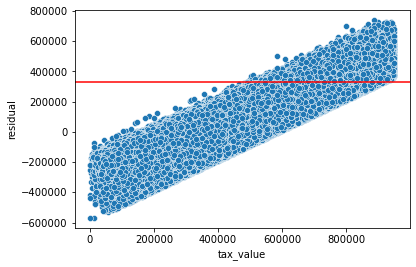

In [32]:
sns.scatterplot(data=train,x='tax_value',y='residual')
plt.axhline(baseline,color='red')

In [10]:
train['baseline']= baseline

In [11]:
train['baseline_residual']= train.tax_value-train.baseline

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model

In [12]:
train['baseline_residual_2']= train.baseline_residual**2
train['residual_2']=train.residual**2

In [14]:
train.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,yhat,residual,baseline,baseline_residual,baseline_residual_2,residual_2
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,314131.125460,-65891.125460,327962.928757,-79722.928757,6.355745e+09,4.341640e+09
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,345309.674341,-256919.674341,327962.928757,-239572.928757,5.739519e+10,6.600772e+10


In [15]:
#calculating sum of squared errors (SSE) by adding up that column
SSE_baseline=train.baseline_residual_2.sum()

#Doing the same thing for the predicted values
SSE=train.residual_2.sum()

In [16]:
#comparing the baseline sume of squared errors to the predicted value sum of squared errors
#we want the minimal SSE value which is the linear regression model i built
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE Baseline = 41138637916742832.0
SSE = 33777310861904692.0


In [18]:
# to calculate the Mean of squared errors divide by the number of occurances/points aka the length
MSE_baseline=SSE_baseline/len(train)

MSE=SSE/len(train)

print(MSE_baseline, MSE)

39596016702.04775 32510725506.882072


In [19]:
# calculating the root mean squared error (RMSE) I simply get the sqaure root of the mean of squared errors

RMSE_baseline=MSE_baseline**.5

RMSE=MSE**.5

print(RMSE_baseline,RMSE)

198987.47875695032 180307.30852320456


In [20]:
# Total sum of squares is the same as sum of squared errors baseline
TSS= SSE_baseline

In [21]:
# sum of squared error for the regression line (unexplained error)
SSE

3.3777310861904692e+16

In [22]:
# calculating explained sum of squares (ESS) is the same as saying  TSS minus SSE

ESS=TSS-SSE
ESS

7361327054838140.0

# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model 
# (i.e. a model that always predicts the average taxvaluedollarcnt amount).


In [24]:
#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error

MSE2_baseline=mean_squared_error(train.tax_value,train.baseline)

MSE2=mean_squared_error(train.tax_value, train.yhat)

In [25]:
print("MSE baseline:", MSE2_baseline) 
print("MSE:", MSE2) 

MSE baseline: 39596016702.04775
MSE: 32510725506.882072


# Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [26]:
def model_or_base(SSE,SSE_baseline):
    if SSE < SSE_baseline:
        print('my model outperforms baseline')
    else:
         print('my model did not perform better than baseline')

In [27]:
model_or_base(SSE,SSE_baseline)

my model outperforms baseline


# 7. What is the amount of variance explained in your model?

In [28]:
#r2_score same as r2 and also known as explained variance score

#import r2_score from sklearn
from sklearn.metrics import r2_score

r2_score(train.tax_value,train.yhat)

0.17893949405267462

# Is your model better than the baseline model?

In [29]:
#yes my model is better than baseline

# 9.Create a file named evaluate.py that contains the following functions.

### plot_residuals(y, yhat): creates a residual plot
### regression_errors(y, yhat): returns the following values:
   ### sum of squared errors (SSE)
   ### explained sum of squares (ESS)
   ### total sum of squares (TSS)
   ### mean squared error (MSE)
   ### root mean squared error (RMSE)
### baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
### better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [30]:
def plot_residuals(y,yhat):
    plt.scatter(y,yhat)
    plt.show()



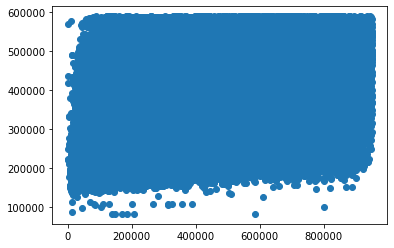

In [31]:
plot_residuals(train.tax_value,train.yhat)

In [ ]:
d